In [1]:
pip install dask

Note: you may need to restart the kernel to use updated packages.


In [2]:
import dask.dataframe as dd

In [3]:
import pandas as pd
from pandasql import sqldf

# Importing Data

In [4]:
crime = dd.read_csv(r"C:\Users\amytu\Downloads\Crimes_-_2001_to_Present.csv",low_memory = False, dtype={'Community Area': 'float64',
       'IUCR': 'object',
       'Ward': 'float64',
        'District': 'float64'})
crime

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
npartitions=28,,,,,,,,,,,,,,,,,,,,,,
,int64,object,object,object,object,object,object,object,bool,bool,int64,float64,float64,float64,object,float64,float64,int64,object,float64,float64,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [5]:
crime1=crime.compute()
crime1

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274430,12936285,JF526139,06/27/2022 10:05:00 AM,025XX N HALSTED ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,43.0,7.0,11,1170513.0,1917030.0,2022,01/03/2023 03:46:28 PM,41.927817,-87.648846,"(41.927817456, -87.648845932)"
274431,12936301,JF526810,12/22/2022 06:00:00 PM,020XX W CORNELIA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,32.0,5.0,14,1161968.0,1923233.0,2022,01/03/2023 03:46:28 PM,41.945022,-87.680072,"(41.945021752, -87.680071764)"
274432,12938501,JF523997,12/26/2022 10:30:00 PM,021XX W DEVON AVE,0915,MOTOR VEHICLE THEFT,"TRUCK, BUS, MOTOR HOME",PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,50.0,2.0,07,1160681.0,1942466.0,2022,01/03/2023 03:46:28 PM,41.997825,-87.684267,"(41.997824802, -87.684266677)"
274433,12936397,JF526745,12/19/2022 02:00:00 PM,044XX N ROCKWELL ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,4.0,05,1158237.0,1929586.0,2022,01/03/2023 03:46:28 PM,41.962532,-87.693611,"(41.962531969, -87.693611152)"


# Cleaning and Checks

In [6]:
crime1.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [7]:
crime1['Primary Type'].unique()

array(['BATTERY', 'THEFT', 'NARCOTICS', 'ASSAULT', 'BURGLARY', 'ROBBERY',
       'DECEPTIVE PRACTICE', 'OTHER OFFENSE', 'CRIMINAL DAMAGE',
       'WEAPONS VIOLATION', 'CRIMINAL TRESPASS', 'MOTOR VEHICLE THEFT',
       'SEX OFFENSE', 'INTERFERENCE WITH PUBLIC OFFICER',
       'OFFENSE INVOLVING CHILDREN', 'PUBLIC PEACE VIOLATION',
       'PROSTITUTION', 'GAMBLING', 'CRIM SEXUAL ASSAULT',
       'LIQUOR LAW VIOLATION', 'CRIMINAL SEXUAL ASSAULT', 'ARSON',
       'STALKING', 'KIDNAPPING', 'INTIMIDATION',
       'CONCEALED CARRY LICENSE VIOLATION', 'NON - CRIMINAL',
       'HUMAN TRAFFICKING', 'OBSCENITY', 'PUBLIC INDECENCY',
       'OTHER NARCOTIC VIOLATION', 'NON-CRIMINAL', 'HOMICIDE',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'RITUALISM',
       'DOMESTIC VIOLENCE'], dtype=object)

In [8]:
crime1.isnull().sum()

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     10073
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614847
Community Area          613476
FBI Code                     0
X Coordinate             84901
Y Coordinate             84901
Year                         0
Updated On                   0
Latitude                 84901
Longitude                84901
Location                 84901
dtype: int64

In [9]:
crime1.shape

(7739100, 22)

In [10]:
replace_values = {35:"DOUGLAS",
36:"OAKLAND",
37:"FULLER PARK",
38:"GRAND BOULEVARD",
39:"KENWOOD",
4:"LINCOLN SQUARE",
40:"WASHINGTON PARK",
41:"HYDE PARK",
42:"WOODLAWN",
1:"ROGERS PARK",
11:"JEFFERSON PARK",
12:"FOREST GLEN",
13:"NORTH PARK",
14:"ALBANY PARK",
15:"PORTAGE PARK",
16:"IRVING PARK",
17:"DUNNING",
18:"MONTCLARE",
19:"BELMONT CRAGIN",
2:"WEST RIDGE",
20:"HERMOSA",
21:"AVONDALE",
22:"LOGAN SQUARE",
23:"HUMBOLDT PARK",
24:"WEST TOWN",
25:"AUSTIN",
26:"WEST GARFIELD PARK",
27:"EAST GARFIELD PARK",
28:"NEAR WEST SIDE",
29:"NORTH LAWNDALE",
3:"UPTOWN",
30:"SOUTH LAWNDALE",
31:"LOWER WEST SIDE",
33:"NEAR SOUTH SIDE",
34:"ARMOUR SQUARE",
10:"NORWOOD PARK",
8:"NEAR NORTH SIDE",
32:"LOOP",
43:"SOUTH SHORE",
44:"CHATHAM",
45:"AVALON PARK",
46:"SOUTH CHICAGO",
47:"BURNSIDE",
59:"MCKINLEY PARK",
6:"LAKE VIEW",
48:"CALUMET HEIGHTS",
49:"ROSELAND",
5:"NORTH CENTER",
50:"PULLMAN",
51:"SOUTH DEERING",
52:"EAST SIDE",
53:"WEST PULLMAN",
54:"RIVERDALE",
55:"HEGEWISCH",
56:"GARFIELD RIDGE",
57:"ARCHER HEIGHTS",
58:"BRIGHTON PARK",
60:"BRIDGEPORT",
61:"NEW CITY",
62:"WEST ELSDON",
63:"GAGE PARK",
64:"CLEARING",
65:"WEST LAWN",
66:"CHICAGO LAWN",
67:"WEST ENGLEWOOD",
68:"ENGLEWOOD",
69:"GREATER GRAND CROSSING",
7:"LINCOLN PARK",
70:"ASHBURN",
71:"AUBURN GRESHAM",
72:"BEVERLY",
73:"WASHINGTON HEIGHTS",
74:"MOUNT GREENWOOD",
75:"MORGAN PARK",
76:"OHARE",
77:"EDGEWATER",
9:"EDISON PARK"}

In [11]:
crime1 = crime1.replace({"Community Area": replace_values})  
crime1

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,NEW CITY,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,AUSTIN,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,CHATHAM,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,AVONDALE,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,AUSTIN,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274430,12936285,JF526139,06/27/2022 10:05:00 AM,025XX N HALSTED ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,43.0,LINCOLN PARK,11,1170513.0,1917030.0,2022,01/03/2023 03:46:28 PM,41.927817,-87.648846,"(41.927817456, -87.648845932)"
274431,12936301,JF526810,12/22/2022 06:00:00 PM,020XX W CORNELIA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,32.0,NORTH CENTER,14,1161968.0,1923233.0,2022,01/03/2023 03:46:28 PM,41.945022,-87.680072,"(41.945021752, -87.680071764)"
274432,12938501,JF523997,12/26/2022 10:30:00 PM,021XX W DEVON AVE,0915,MOTOR VEHICLE THEFT,"TRUCK, BUS, MOTOR HOME",PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,50.0,WEST RIDGE,07,1160681.0,1942466.0,2022,01/03/2023 03:46:28 PM,41.997825,-87.684267,"(41.997824802, -87.684266677)"
274433,12936397,JF526745,12/19/2022 02:00:00 PM,044XX N ROCKWELL ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,LINCOLN SQUARE,05,1158237.0,1929586.0,2022,01/03/2023 03:46:28 PM,41.962532,-87.693611,"(41.962531969, -87.693611152)"


In [12]:
crime1.Date.max()

'12/31/2022 12:59:00 PM'

In [13]:
crime1.Date.min()

'01/01/2001 01:00:00 AM'

In [14]:
#checked with csv - no duplicate rows found
crime1['Case Number'].nunique()

7738561

# Creating Subset for Tableau Analysis

In [17]:
crime1 = crime1.loc[(crime1['Year'] > 2006) & (crime1['Year'] <= 2013)]
crime1.shape

(2623219, 22)

In [20]:
crime1 = sqldf('''SELECT *
FROM crime1
WHERE Description like "%THEFT%" or Description like "%BURGLARY%" or Description like "%ROBBERY%" or Description like "%MOTOR VEHICLE THEFT%"''') 

In [21]:
crime1.shape

(137862, 22)

In [22]:
crime1.to_csv(r"C:\Users\amytu\OneDrive\Documents\Tableau\Chicago Crime Data.csv")

# Quick Visualization of Major Question

In [24]:
import matplotlib.pyplot as plt

In [33]:
y = crime1.Year
y

0         2012
1         2012
2         2012
3         2011
4         2011
          ... 
137857    2013
137858    2010
137859    2013
137860    2010
137861    2013
Name: Year, Length: 137862, dtype: int64

In [37]:
new_df= crime1.Year
new_df

0         2012
1         2012
2         2012
3         2011
4         2011
          ... 
137857    2013
137858    2010
137859    2013
137860    2010
137861    2013
Name: Year, Length: 137862, dtype: int64

In [54]:
df2 = crime1.groupby('Year')['ID'].agg('count').reset_index()
df2

,Year,ID
0,2007,20883
1,2008,22058
2,2009,20748
3,2010,18196
4,2011,18401
5,2012,19427
6,2013,18149


<BarContainer object of 7 artists>

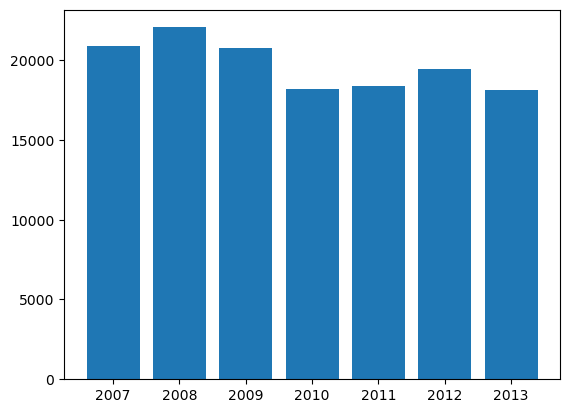

In [55]:
plt.bar(df2['Year'], df2['ID'])

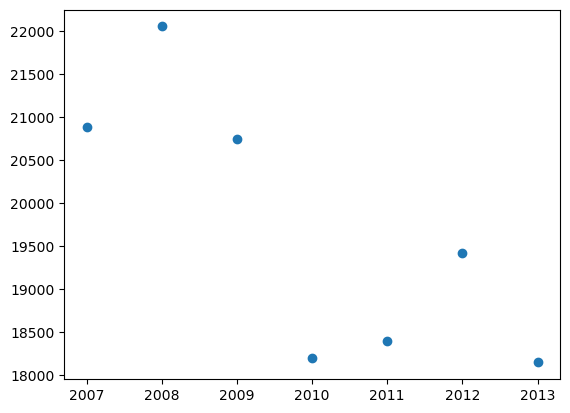

In [56]:
plt.scatter(df2['Year'], df2['ID'])

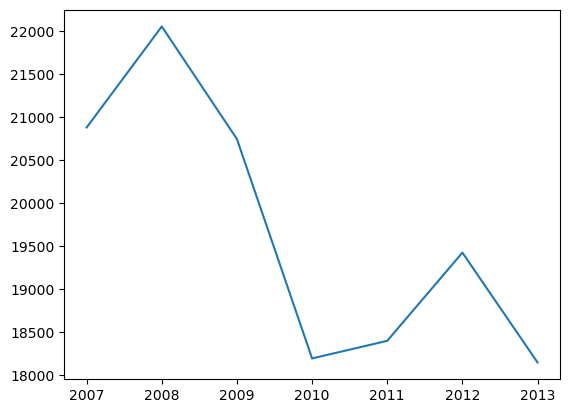

In [57]:
plt.plot(df2['Year'], df2['ID'])

# Functions

In [59]:
df2.describe()

,Year,ID
count,7.000000,7.000000
mean,2010.000000,19694.571429
std,2.160247,1553.882112
min,2007.000000,18149.000000
25%,2008.500000,18298.500000
50%,2010.000000,19427.000000
75%,2011.500000,20815.500000
max,2013.000000,22058.000000


In [62]:
19695 + 1554

21249

In [61]:
19695 - 1554

18141

In [69]:
def x (x):
    
    if x < 18141:
        return ("Less than Average")
    elif x >= 18141 and x <= 21249:
        return ("Average")
    else:
        return("Above Average")

In [70]:
df2['rates']=df2['ID'].apply(x)
df2

,Year,ID,rates
0,2007,20883,Average
1,2008,22058,Above Average
2,2009,20748,Average
3,2010,18196,Average
4,2011,18401,Average
5,2012,19427,Average
6,2013,18149,Average
